 TP n°2 Acquisition de Connaissances - Calvin EONO et Vincent ETIEN

Le jeu de données est un tableau de statistiques de pokémons (Type, Attaque,...). Nous utiliserons 10 attributs (2 nominales, 8 numériques) et 800 exemples. Le numéro et nom du pokémon ne vont pas être des attributs pertinents dû faite qu'ils sont différents pour chaque exemple. La classe à déterminer est un booléen "Légendaire". On sépare les données en jeux de test et de train avec pour proportion 80/20.

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from IPython.display import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


X=np.zeros((800,10))
Y=np.zeros(800)

max_f = 0
h2float={}
for i,l in enumerate(open('../input/Pokemon.csv')):
    if(i==0):
        continue
    t_l = l.rstrip('\r\n').split(',')
    for j,c in enumerate(t_l[2:-1]):
        if (j==0 or j==1):
            if c not in h2float:
                max_f += 1
                h2float[c]=max_f
            X[i-1,j]=h2float[c]
        else: X[i-1,j]=float(c)
    Y[i-1]= 0. if t_l[-1]=='False' else 1.
X_train, X_test = X[:160], X[160:]
Y_train, Y_test = Y[:160], Y[160:]

#clf = clf.fit(X_train, Y_train)
#print(clf.score(X_test,Y_test))   


**Resultat RandomForest avec cross-validation : **

In [16]:
clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, X, Y, cv=10)
print(scores.mean())

0.9411314267854352


Le nombre d'arbres lors du Random Forest (n_estimators) a été fixé à 100 afin d'améliorer les résultats. Une valeur plus élevée n'améliore pas les résultats et la diminuer les dégrade. 

Ces résultats sont très bons, cela est très certainement dû aux statistiques très différentes entre les pokémons légendaires et ceux qui ne le sont pas. Il sera donc sûrement difficile de battre un tel score. 

Nous allons maintenant essayer d'autres classifieurs pour évaluer leur performance sur ce jeu de données.  


**Régression logistique :**


In [17]:
#solver newton-cg score = 0.925
#solver liblinear  score = 0.903

clf1 = LogisticRegression(solver='newton-cg').fit(X_train,Y_train)


scores = clf1.score(X_test,Y_test)
print(scores)

0.925


Une régression logistique donne également des résultats très corrects. 

In [18]:
clf2 = LogisticRegression(solver='newton-cg')
scores = cross_val_score(clf2, X, Y, cv=10)
print(scores.mean())

0.942491014220972


Une régression logistique avec cross-validation donne des résultats approchant ceux de la RandomForest. Plusieurs solvers ont été utilisés ( liblinear, lbfgs,... ) et newton-cg est celui qui offre la meilleure performance. 

**Classifieur Bayesien naif :**

Nous allons essayer un autre classifieur, toujours dans l'optique d'améliorer des résultats déjà très bons.

In [19]:
clf3 = GaussianNB().fit(X_train,Y_train)
scores = cross_val_score(clf3, X, Y, cv=10)
print("sans cross validation : ",clf3.score(X_test,Y_test),"\ncross validation :",scores.mean())

sans cross validation :  0.903125 
cross validation : 0.9264103766213472


Nous obtenons des résultats assez bons, mais qui restent inférieurs à ce que l'on peut obtenir avec un RandomForest.
Il semble compliqué de pouvoir faire mieux au vu du 0.94 de la Random Forest.
En effet, les données que nous avons choisies semblent trop simples, ce qui explique le fait que nous n'ayons pas de résultat en dessous des 0.9.

**Explication des résultats et arbre de décision :**

Nous avons donc cherché ce qui pourrait créer cette facilité d'apprentissage dans nos données.
Après avoir observé les données nous nous sommes rendus compte que les pokémons légendaires étant plus puissant que les pokemons classiques, le total de leurs statistiques étaient beaucoup plus élevés que celui des autres pokemons.

Pour tester cette hypothèse nous avons donc utilisé un arbre de décision sur nos données : 


sans cross validation:  0.921875
avec:  0.9511017346460383


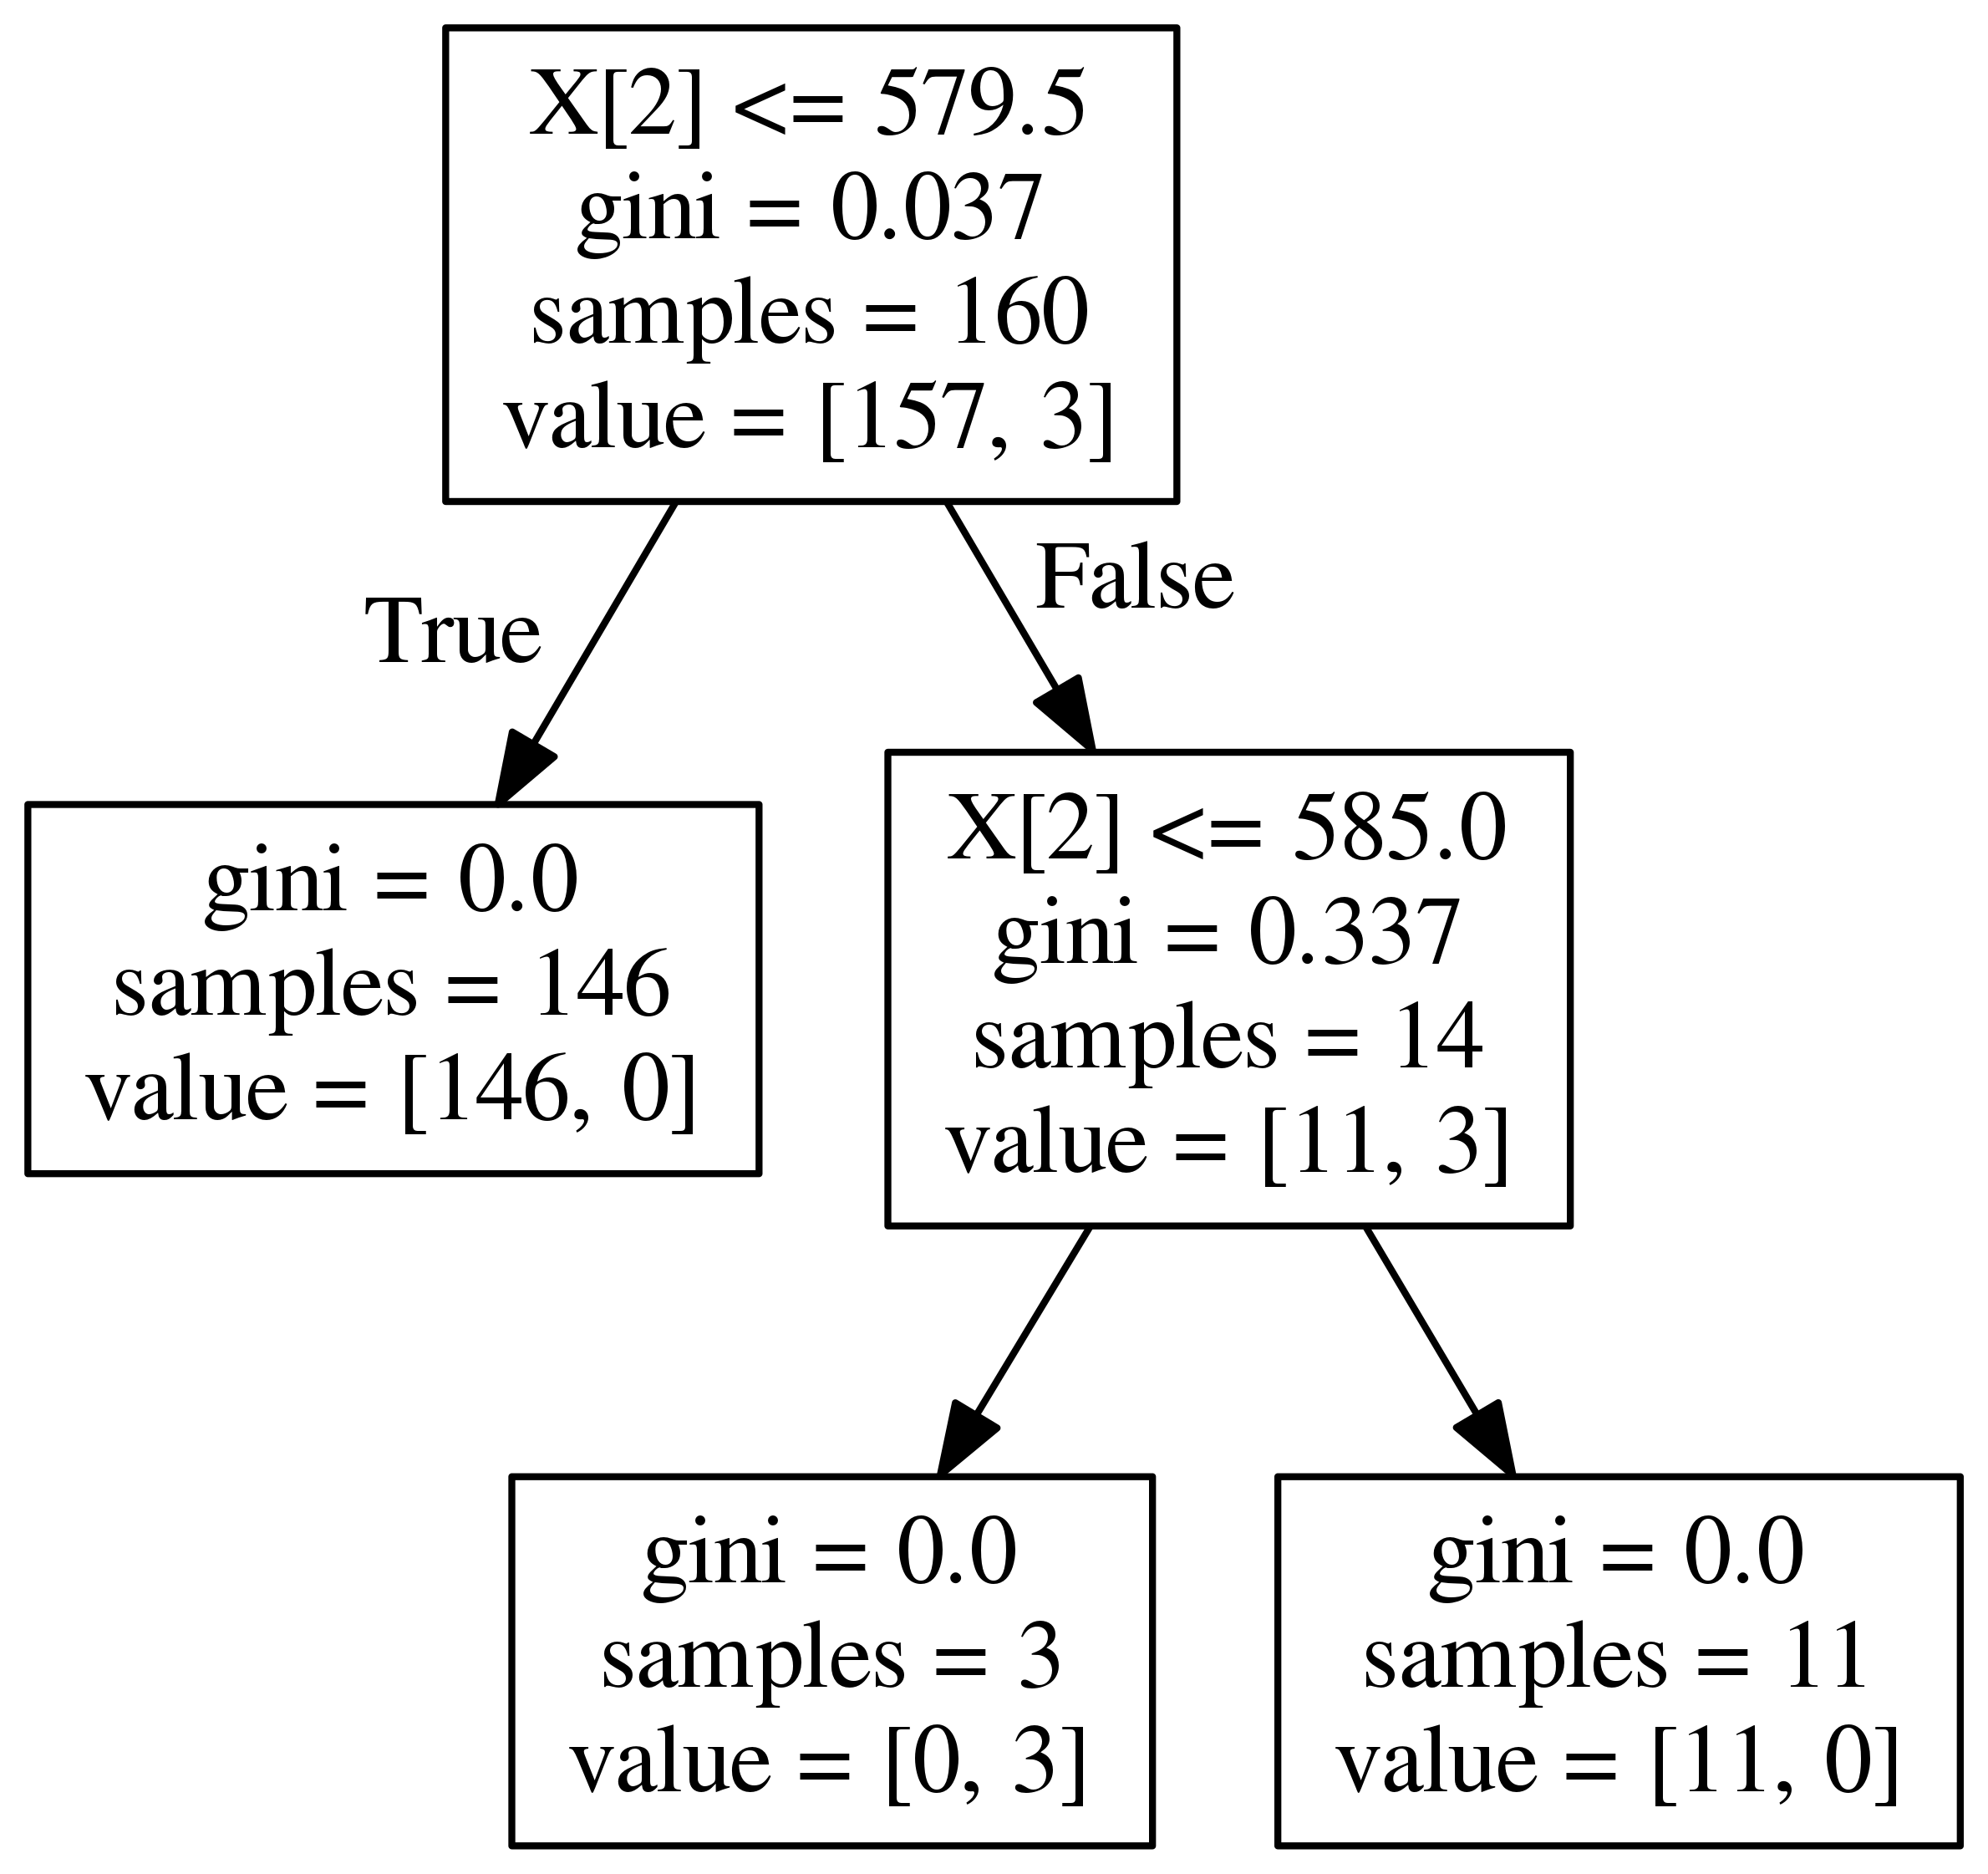

In [20]:
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
scores = clf.score(X_test,Y_test)

print("sans cross validation: ",scores)
scores = cross_val_score(clf, X, Y, cv=10)
print("avec: ",scores.mean())
tree.export_graphviz(clf, out_file='tree.dot')
!dot -Tpng tree.dot -o tree_limited.png -Gdpi=600
Image(filename = 'tree_limited.png')

La colonne du total des statistiques est la deuxième colonne. Nous pouvons observer sur cet arbre que les classifications sont effectuées uniquement à partir de celle-ci. En effet, les pokémons ayant plus de 585 en total des statistiques sont quasiment tous légendaires.
On remarque également que l'arbre de décision obtient des résultats meilleurs que la Random Forest. 

**Conclusion**

Nous avons pu apprendre à manipuler une série de données et avons dû faire face à ses particularités, comme la présence d'attributs nominaux ou le fait que la classe pouvait être prédite très simplement à partir d'un seul des attributs.
